# explore coding variant overlap between scz meta study and our paper

In [36]:
import glob,os
import pandas as pd
import mygene
import seaborn as sns
import matplotlib.pyplot as plt
mg = mygene.MyGeneInfo()

In [5]:
# # polygenic genesets
# gene_files = glob.glob('D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/*txt')
# gene_files
scz_genes = pd.read_table('D_mpraanalyze_barcode_allelic/egene_gtex_psychencode/SCZ.txt', header=None).iloc[:,0].values
len(scz_genes)

433

singh data

querying 1-210...done.


In [27]:
%%time
singh_df = pd.read_csv('coding_variants/meta_results_2021_04_22_12_33_17_sing.csv')#.fillna(0)
symbols = [x.get('symbol','') for x in mg.getgenes(singh_df.Gene, fields='name,symbol,entrezgene,taxid')]
singh_df['symbol'] = symbols
print(singh_df.shape)


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-18321...done.
(18321, 16)
CPU times: user 266 ms, sys: 41.6 ms, total: 307 ms
Wall time: 47.4 s


In [49]:
singh_df[:5]

,Gene,Description,Case PTV,Control PTV,Case Missense (MPC ≥ 3),Control Missense (MPC ≥ 3),Case Missense (2 ≤ MPC < 3),Control Missense (2 ≤ MPC < 3),De novo PTV,De Novo Missense (MPC ≥ 3),De Novo Missense (2 ≤ MPC < 3),P meta,Q meta,OR (Class I),OR (Class II),symbol
0,ENSG00000099381,"SET domain containing 1A, histone lysine methy...",15.0,3.0,3.0,4.0,11,10,3.0,NaN,NaN,2.000000e-12,3.620000e-08,10.3,4.42,SETD1A
1,ENSG00000055130,cullin 1,8.0,1.0,2.0,0.0,7,16,3.0,NaN,NaN,2.010000e-09,1.820000e-05,44.2,1.76,CUL1
2,ENSG00000130227,exportin 7,12.0,1.0,1.0,1.0,10,32,1.0,NaN,NaN,7.180000e-09,4.340000e-05,28.1,1.25,XPO7
3,ENSG00000038382,trio Rho guanine nucleotide exchange factor,18.0,16.0,0.0,0.0,24,102,2.0,NaN,NaN,6.350000e-08,2.880000e-04,5.02,0.944,TRIO
4,ENSG00000006283,calcium voltage-gated channel subunit alpha1 G,10.0,13.0,8.0,4.0,55,134,NaN,NaN,1.0,4.570000e-07,1.540000e-03,4.25,1.68,CACNA1G


In [30]:
singh_df_filt = singh_df[singh_df['Q meta']<0.05]

print(singh_df_filt.shape)

# singh_df_filt[:5]
singh_df_filt.symbol.values

(32, 16)


array(['SETD1A', 'CUL1', 'XPO7', 'TRIO', 'CACNA1G', 'SP4', 'GRIA3',
       'GRIN2A', 'HERC1', 'RB1CC1', 'HCN4', 'AKAP11', 'ZNF136', 'SRRM2',
       'NR3C2', 'ZMYM2', 'FAM120A', 'SLF2', 'KDM6B', 'DNM3', 'ASH1L',
       'STAG1', 'H1-4', 'PREP', 'MAGEC1', 'MAGI2', 'DAGLA', 'OR4P4',
       'SLC22A11', 'ANKRD12', 'SV2A', 'EIF2S3'], dtype=object)

In [31]:
singh_df.to_csv('coding_variants/singh_wsym.csv')
singh_df_filt.to_csv('coding_variants/singh_wsym_fdr05.csv')

In [35]:
print(len(scz_genes))
print(len(set(singh_df.symbol).intersection(scz_genes)))

433
355


In [37]:
singh_df_scz = singh_df[singh_df.symbol.isin(scz_genes)]

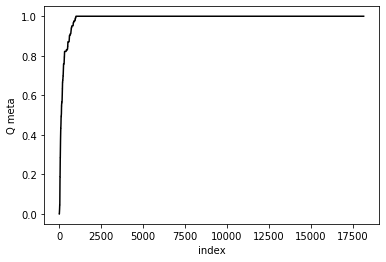

In [62]:
sns.lineplot(data=singh_df.reset_index(), x='index', y='Q meta',color='black')


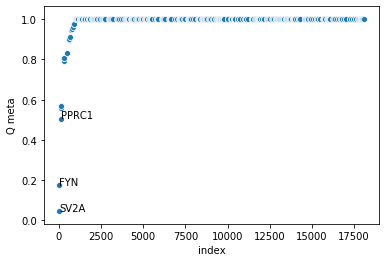

In [54]:
sns.scatterplot(data=singh_df_scz.reset_index(), x='index', y='Q meta')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

singh_df_scz_filt = singh_df_scz.reset_index()
singh_df_scz_filt = singh_df_scz_filt[singh_df_scz_filt['Q meta']<.55]
label_point(singh_df_scz_filt['index'],
            singh_df_scz_filt['Q meta'], 
            singh_df_scz_filt['symbol'], plt.gca())  
plt.show()

In [43]:
singh_df_scz.reset_index().(x='index',y='Q meta')

AttributeError: 'DataFrame' object has no attribute 'scatter'

# from ripke 2020

In [64]:
ripke_2020 = pd.read_excel('/Users/mguo123/Google Drive/1_khavari/papers/tables/Supplementary Table 20 - Prioritised Genes.xlsx',sheet_name='ST20 all criteria')
ripke_2020[:5]

,Index.SNP,Ensembl.ID,Symbol.ID,gene_biotype,FINEMAPk3.5,nonsynPP0.10,UTRPP0.10,k3.5singleGene,SMRpsych,SMRfetal,...,adultFUSION.testable,sig.adultFUSION,fetalFUSION.testable,sig.fetalFUSION,EpiXcan.testable.gene.filtered,sig.EpiXcan.gene.filtered,SCHEMA,ASD,DDD,Prioritised
0,rs11121172,ENSG00000142599,RERE,protein_coding,1,0,0,1,0,0,...,1,1,0,0,1,1,0,0,1,1
1,rs113113059,ENSG00000112659,CUL9,protein_coding,1,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
2,rs72986630,ENSG00000197933,ZNF823,protein_coding,1,0,1,1,0,0,...,1,1,0,0,1,1,0,0,0,1
3,rs2022265,ENSG00000065609,SNAP91,protein_coding,1,0,0,1,1,0,...,1,1,0,0,1,1,0,0,0,1
4,rs4702,ENSG00000140564,FURIN,protein_coding,1,0,1,1,1,0,...,1,1,0,0,1,1,0,0,0,1


In [68]:
ripke_2020.sum(axis=0)

Index.SNP                         rs11121172rs113113059rs72986630rs2022265rs4702...
Ensembl.ID                        ENSG00000142599ENSG00000112659ENSG00000197933E...
Symbol.ID                         RERECUL9ZNF823SNAP91FURINCACNA1IRP11-73M18.2CY...
gene_biotype                      protein_codingprotein_codingprotein_codingprot...
FINEMAPk3.5                                                                     569
nonsynPP0.10                                                                     12
UTRPP0.10                                                                        12
k3.5singleGene                                                                   65
SMRpsych                                                                         81
SMRfetal                                                                         21
SMRblood                                                                         33
SMRmap                                                                      

In [69]:
ripke_2020 = ripke_2020[ripke_2020.Prioritised>0]
ripke_2020.shape

(130, 24)

In [70]:
set(ripke_2020['Symbol.ID']).intersection(scz_genes)

{'ATG13',
 'CISD2',
 'CLCN3',
 'DDHD2',
 'IMMP2L',
 'IRF3',
 'LSM1',
 'MAN2A1',
 'PCCB',
 'PCDHA2',
 'PCDHA8',
 'RERE',
 'RNASEH2C',
 'SETD6',
 'SLC9B1',
 'THOC7',
 'ZNF823'}

# laramie


In [71]:
known_genes_df = pd.read_excel('coding_variants/Schizophrenia_gene_list_2_24_20_FINAL.xlsx',sheet_name='schizophrenia_list_2_24_20')
known_genes_df

,Order,Gene_symbol,Meta_analysis_p_value[SCHEMA]__FINEMAP_posterior_probability[Pardinas_2018]__credible_causal_5orless[Lam_2019],Source
0,1,DRD2,0.6915,Pardinas 2018 FINEMAP posterior probability > ...
1,2,SETD1A,7.73e-13,SCHEMA browser top variants 1_30_2020
2,3,GRIN2A,1.42e-07,"SCHEMA browser top variants 1_30_2020, GWAS locus"
3,4,SP4,5.08e-07,"SCHEMA browser top variants 1_30_2020, GWAS locus"
4,5,KDM6B,1.15e-05,"SCHEMA browser top variants 1_30_2020, Gene se..."
...,...,...,...,...
75,76,CHRNA5,"p=1.07E-12, credible causal=4",Lam 2019 credible causal 5 or less
76,77,CHRNA3,"p=1.07E-12, credible causal=4",Lam 2019 credible causal 5 or less
77,78,CHRNB4,"p=1.07E-12, credible causal=4",Lam 2019 credible causal 5 or less
78,79,PTPRF,"p=1.99E-14, credible causal=5",Lam 2019 credible causal 5 or less


In [72]:
set(known_genes_df.Gene_symbol).intersection(set(scz_genes))

{'C4A', 'SV2A', 'ZNF823'}

In [75]:
print('DAGLA' in scz_genes)

False


In [78]:
coding_variant_genes = ['AKT1','C4A','CACNA1G','DAGLA','MAGI2','MTHFR','STAG1','SV2A','XPO7','ZNF823','R3HDM2','PTPRF','KDM4A','TCF20']
print(len(coding_variant_genes))
for x in sorted(coding_variant_genes):
    print(x, x in scz_genes)

14
AKT1 True
C4A True
CACNA1G False
DAGLA False
KDM4A False
MAGI2 False
MTHFR True
PTPRF False
R3HDM2 False
STAG1 False
SV2A True
TCF20 False
XPO7 False
ZNF823 True
